In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 課題1
## 2変数正規分布に従う乱数をプロットする
- そのままプロット
- 標準化してプロット
    - サンプルからのμ, Σを使用して計算
    - パラメータからのμ, Σを使用して計算
- 無相関化してプロット

In [5]:
def standardize(data, mean=None, cov=None):
    if mean is None:
        mean = data.mean(axis=0)

    if cov is None:
        cov = np.cov(data.T)

    return (data - mean) / np.sqrt(np.diag(cov))


def decorrelate(data):
    cov = np.cov(data.T)
    la, eig_s = np.linalg.eig(cov)
    return np.dot(eig_s.T, data.T).T


def plot_data(data, title):
    print(title)
    print(f'平均:\n{data.mean(axis=0)}\n')
    print(f'共分散行列:\n{np.cov(data.T)}\n')
    sns.jointplot(data[:, 0], data[:, 1], s=15)
    plt.show()

In [6]:
def transform(data, title, method, mean, sigma):
    if method is None:
        return data
    
    if title == 'standardization(parameter\'s μ, Σ)':
        return method(data, mean, sigma)

    return method(data)


methods = {'original': None,
           'standardization(sample\'s μ, Σ)': standardize,
           'standardization(parameter\'s μ, Σ)': standardize,
           'decorrelation': decorrelate}

In [7]:
def create_data():
    mean = np.array([-5, -5])
    sigma = np.array([[5, -3], [-3, 5]])
    sample = np.random.multivariate_normal(mean, sigma, 5000)
    data1 = {'mean': mean, 'sigma': sigma, 'sample': sample}

    mean = np.array([0, 0])
    sigma = np.array([[15, 3], [3, 4]])
    sample = np.random.multivariate_normal(mean, sigma, 5000)
    data2 = {'mean': mean, 'sigma': sigma, 'sample': sample}

    mean = np.array([5, 5])
    sigma = np.array([[4, 10], [10, 15]])
    sample = np.random.multivariate_normal(mean, sigma, 5000)
    data3 = {'mean': mean, 'sigma': sigma, 'sample': sample}
    
    return np.array([data1, data2, data3])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: covariance is not positive-semidefinite.
  
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


{'mean': array([-5, -5]), 'sigma': array([[ 5, -3],
       [-3,  5]]), 'sample': array([[-2.97023425, -9.36805504],
       [-6.16263928, -0.39260678],
       [-6.30713335, -6.90801486],
       ...,
       [-7.44692621,  0.18627811],
       [-5.72491198, -6.31430491],
       [-4.15678895, -7.5432387 ]])}
original
平均:
[-5.05689832 -4.98475427]

共分散行列:
[[ 4.8262515  -2.86627095]
 [-2.86627095  4.95335725]]



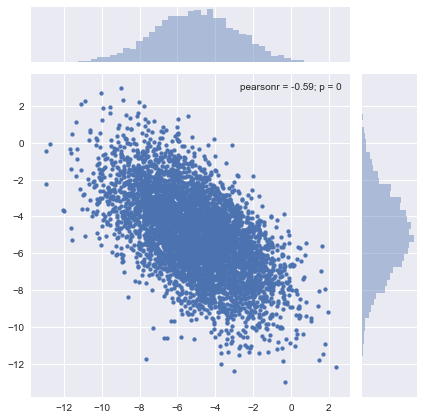

standardization(sample's μ, Σ)
平均:
[7.21405158e-15 8.37818703e-16]

共分散行列:
[[ 1.         -0.58622244]
 [-0.58622244  1.        ]]



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


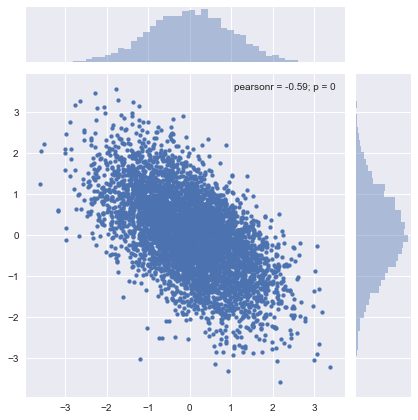

standardization(parameter's μ, Σ)
平均:
[-0.0254457  0.0068181]

共分散行列:
[[ 0.9652503  -0.57325419]
 [-0.57325419  0.99067145]]



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


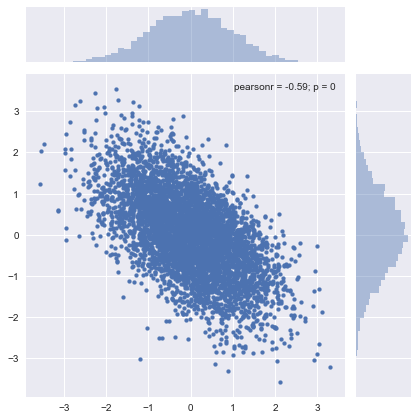

decorrelation
平均:
[7.10064989 0.02769382]

共分散行列:
[[ 2.02282894e+00 -7.73935826e-16]
 [-7.73935826e-16  7.75677980e+00]]



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


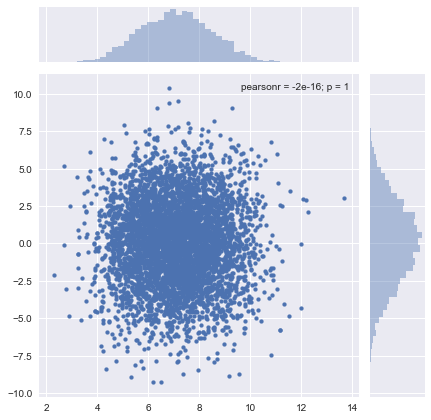

{'mean': array([0, 0]), 'sigma': array([[15,  3],
       [ 3,  4]]), 'sample': array([[-6.64019468, -1.63245937],
       [ 8.33701647,  1.18471036],
       [ 1.2818908 ,  1.49567452],
       ...,
       [-1.4904092 , -1.45225629],
       [-2.93525937, -3.09834439],
       [-3.14611984,  1.21200207]])}
original
平均:
[-0.00068913 -0.00458135]

共分散行列:
[[15.57917387  2.94102648]
 [ 2.94102648  3.88255314]]



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


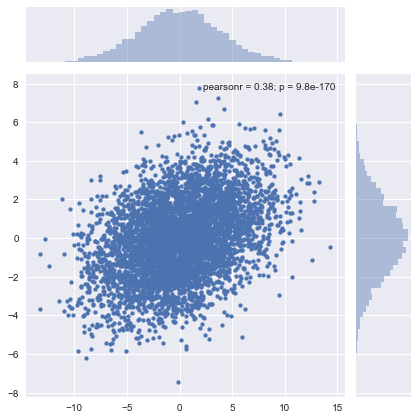

standardization(sample's μ, Σ)
平均:
[ 1.29452005e-17 -2.79776202e-18]

共分散行列:
[[1.         0.37815341]
 [0.37815341 1.        ]]



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


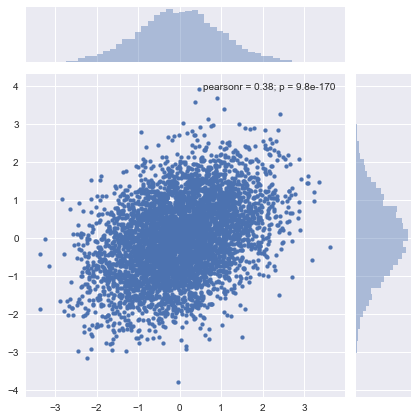

standardization(parameter's μ, Σ)
平均:
[-0.00017793 -0.00229067]

共分散行列:
[[1.03861159 0.37968489]
 [0.37968489 0.97063829]]



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


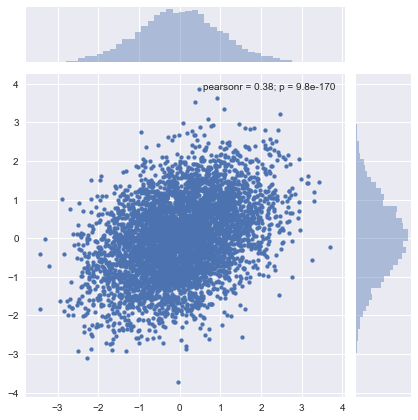

decorrelation
平均:
[-0.00172823 -0.00429847]

共分散行列:
[[ 1.62770357e+01 -7.92413633e-17]
 [-7.92413633e-17  3.18469128e+00]]



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


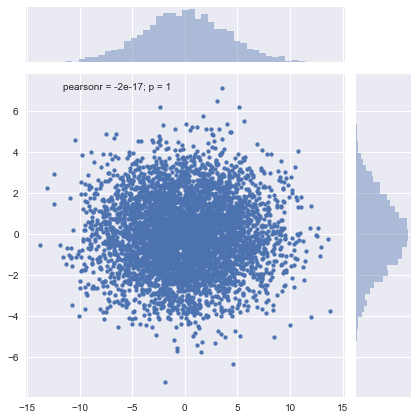

{'mean': array([5, 5]), 'sigma': array([[ 4, 10],
       [10, 15]]), 'sample': array([[ 6.99171558,  3.6079118 ],
       [ 5.12587435,  1.28266998],
       [ 4.30827775,  2.85682277],
       ...,
       [ 4.58275227,  4.63986995],
       [ 8.00504094, 11.08689736],
       [ 7.55897046, 14.69414548]])}
original
平均:
[5.05430765 5.05984245]

共分散行列:
[[ 6.61330293  7.93621066]
 [ 7.93621066 15.23996708]]



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


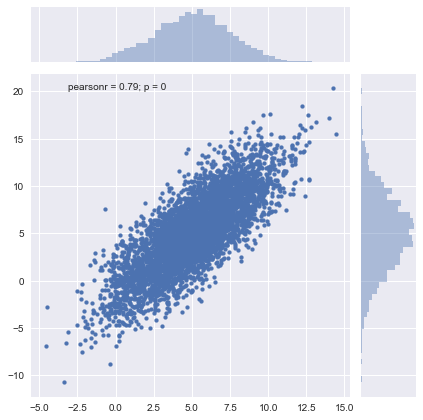

standardization(sample's μ, Σ)
平均:
[1.83588700e-15 1.14432908e-15]

共分散行列:
[[1.         0.79051837]
 [0.79051837 1.        ]]



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


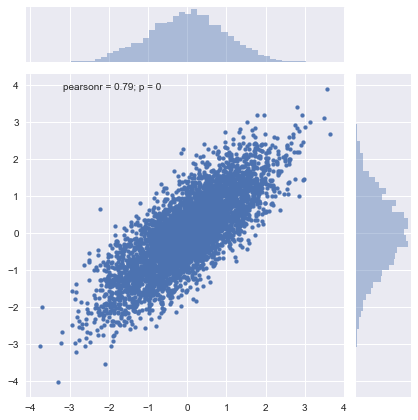

standardization(parameter's μ, Σ)
平均:
[0.02715382 0.01545125]

共分散行列:
[[1.65332573 1.02456039]
 [1.02456039 1.01599781]]



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


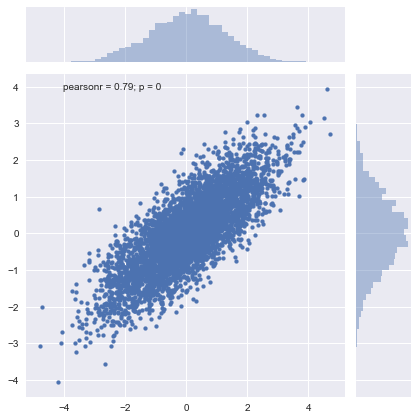

decorrelation
平均:
[-1.75809926 -6.93232417]

共分散行列:
[[1.89401228e+00 5.62862419e-16]
 [5.62862419e-16 1.99592577e+01]]



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


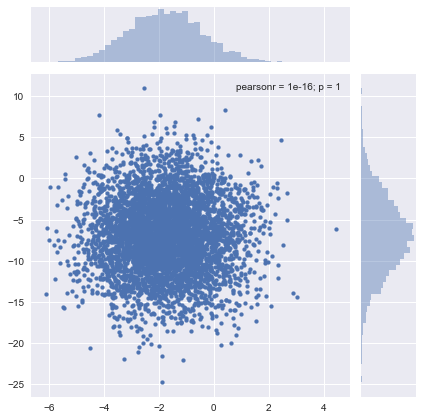

In [8]:
data = create_data()

for i in data:
    print(i)
    for title, method in methods.items():
        transformed_data = transform(i['sample'], title, method, i['mean'], i['sigma'])
        plot_data(transformed_data, title)

# 課題2
## 多変数正規分布の混合分布と、その識別境界をプロットする

In [9]:
def create_mixture_distribution(mean1, sigma1, mean2, sigma2, rate):
    sample = np.random.multivariate_normal(mean1, sigma1, int(10000 * rate))
    distribution1 = {'mean': mean1, 'sigma': sigma1, 'sample': sample}

    sample = np.random.multivariate_normal(mean2, sigma2, int(10000 * (1 - rate)))
    distribution2 = {'mean': mean2, 'sigma': sigma2, 'sample': sample}
    
    mix = np.vstack((distribution1['sample'], distribution2['sample']))
    return mix, distribution1, distribution2


def discriminate(data, distribution1, distribution2, c1_rate, is_calc_sigma_and_mean=False):
    if is_calc_sigma_and_mean:
        mean1 = distribution1['sample'].mean(axis=0)
        sigma1 = np.cov(distribution1['sample'].T)
        mean2 = distribution2['sample'].mean(axis=0)
        sigma2 = np.cov(distribution2['sample'].T)
    else:
        mean1 = distribution1['mean']
        sigma1 = distribution1['sigma']
        mean2 = distribution2['mean']
        sigma2 = distribution2['sigma']

    sigma1_inv = np.linalg.inv(sigma1)
    sigma2_inv = np.linalg.inv(sigma2)

    p_c1 = c1_rate
    p_c2 = 1 - c1_rate

    second_order_term = data.dot(sigma1_inv - sigma2_inv).dot(data.T)
    one_order_term = 2 * (mean2.dot(sigma2_inv) - mean1.dot(sigma1_inv)).dot(data.T)
    const_term = np.log(np.linalg.det(sigma1) / np.linalg.det(sigma2)) - 2 * np.log(p_c1 / p_c2) \
                 + mean1.dot(sigma1_inv).dot(mean1.T) - mean2.dot(sigma2_inv).dot(mean2.T)

    decision_surface = second_order_term + one_order_term + const_term
    return np.diag(decision_surface)


def create_grid(data):
    axis_min = data.min(axis=0).min()
    axis_max = data.max(axis=0).max()
    axis = np.linspace(axis_min, axis_max, (axis_max - axis_min) * 1.5)
    return np.meshgrid(axis, axis)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


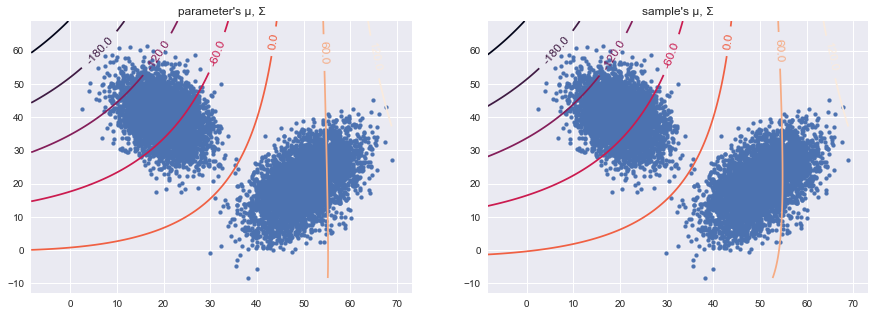

In [14]:
mean1 = np.array([20, 40])
sigma1 = np.array([[20, -10], [-10, 40]])
mean2 = np.array([50, 20])
sigma2 = np.array([[30, 20], [20, 50]])
c1_rate = 0.5

data, distribution1, distribution2 = create_mixture_distribution(mean1, sigma1, mean2, sigma2, c1_rate)
x, y = create_grid(data)

result = discriminate(np.vstack((x.flatten(), y.flatten())).T, distribution1, distribution2, c1_rate)
result_grid = result.reshape(len(x), len(y))
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('parameter\'s μ, Σ')
contour = plt.contour(x, y, result_grid)
contour.clabel(fmt='%.1f')
plt.scatter(data[:, 0], data[:, 1], s=15)

result = discriminate(np.vstack((x.flatten(), y.flatten())).T, distribution1, distribution2, c1_rate, True)
result_grid = result.reshape(len(x), len(y))
plt.subplot(1, 2, 2)
plt.title('sample\'s μ, Σ')
contour = plt.contour(x, y, result_grid)
contour.clabel(fmt='%.1f')
plt.scatter(data[:, 0], data[:, 1], s=15)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


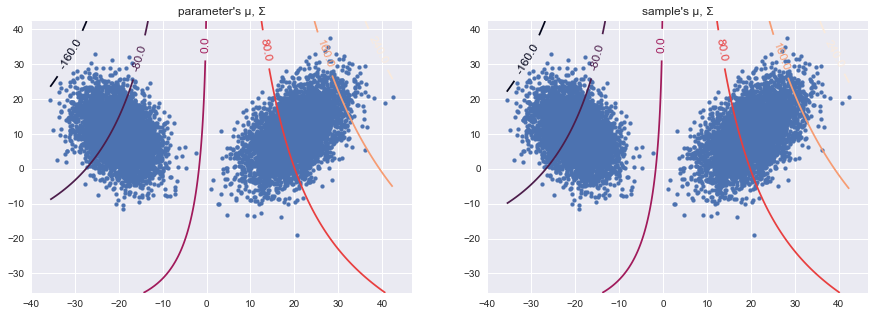

In [19]:
mean1 = np.array([-20, 10])
sigma1 = np.array([[20, -10], [-10, 40]])
mean2 = np.array([20, 10])
sigma2 = np.array([[30, 20], [20, 50]])
c1_rate = 0.5

data, distribution1, distribution2 = create_mixture_distribution(mean1, sigma1, mean2, sigma2, c1_rate)
x, y = create_grid(data)

result = discriminate(np.vstack((x.flatten(), y.flatten())).T, distribution1, distribution2, c1_rate)
result_grid = result.reshape(len(x), len(y))
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('parameter\'s μ, Σ')
contour = plt.contour(x, y, result_grid)
contour.clabel(fmt='%.1f')
plt.scatter(data[:, 0], data[:, 1], s=15)

result = discriminate(np.vstack((x.flatten(), y.flatten())).T, distribution1, distribution2, c1_rate, True)
result_grid = result.reshape(len(x), len(y))
plt.subplot(1, 2, 2)
plt.title('sample\'s μ, Σ')
contour = plt.contour(x, y, result_grid)
contour.clabel(fmt='%.1f')
plt.scatter(data[:, 0], data[:, 1], s=15)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


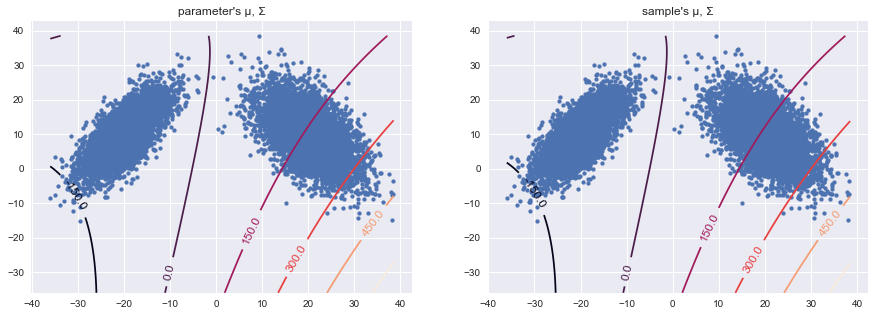

In [20]:
mean1 = np.array([-20, 10])
sigma1 = np.array([[20, 20], [20, 40]])
mean2 = np.array([20, 10])
sigma2 = np.array([[30, -20], [-20, 50]])
c1_rate = 0.5

data, distribution1, distribution2 = create_mixture_distribution(mean1, sigma1, mean2, sigma2, c1_rate)
x, y = create_grid(data)

result = discriminate(np.vstack((x.flatten(), y.flatten())).T, distribution1, distribution2, c1_rate)
result_grid = result.reshape(len(x), len(y))
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('parameter\'s μ, Σ')
contour = plt.contour(x, y, result_grid)
contour.clabel(fmt='%.1f')
plt.scatter(data[:, 0], data[:, 1], s=15)

result = discriminate(np.vstack((x.flatten(), y.flatten())).T, distribution1, distribution2, c1_rate, True)
result_grid = result.reshape(len(x), len(y))
plt.subplot(1, 2, 2)
plt.title('sample\'s μ, Σ')
contour = plt.contour(x, y, result_grid)
contour.clabel(fmt='%.1f')
plt.scatter(data[:, 0], data[:, 1], s=15)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


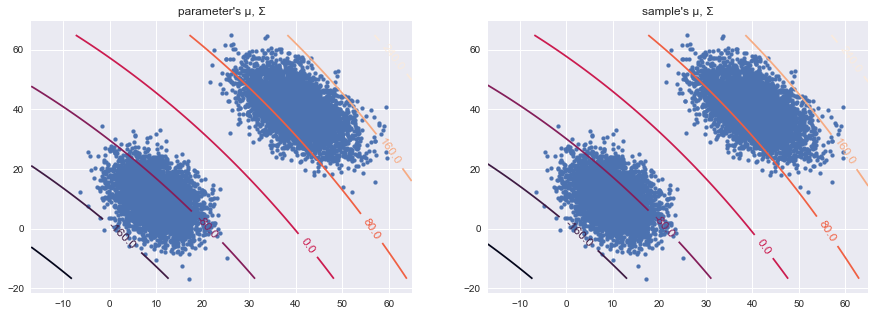

In [22]:
mean1 = np.array([10, 10])
sigma1 = np.array([[20, -10], [-10, 40]])
mean2 = np.array([40, 40])
sigma2 = np.array([[30, -20], [-20, 50]])
c1_rate = 0.5

data, distribution1, distribution2 = create_mixture_distribution(mean1, sigma1, mean2, sigma2, c1_rate)
x, y = create_grid(data)

result = discriminate(np.vstack((x.flatten(), y.flatten())).T, distribution1, distribution2, c1_rate)
result_grid = result.reshape(len(x), len(y))
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('parameter\'s μ, Σ')
contour = plt.contour(x, y, result_grid)
contour.clabel(fmt='%.1f')
plt.scatter(data[:, 0], data[:, 1], s=15)

result = discriminate(np.vstack((x.flatten(), y.flatten())).T, distribution1, distribution2, c1_rate, True)
result_grid = result.reshape(len(x), len(y))
plt.subplot(1, 2, 2)
plt.title('sample\'s μ, Σ')
contour = plt.contour(x, y, result_grid)
contour.clabel(fmt='%.1f')
plt.scatter(data[:, 0], data[:, 1], s=15)